In [1]:
import pystan
import arviz

In [2]:
model = """
data {
  real<lower=0> noise;
  int<lower=1> K; // number of states
  int<lower=1> N;
  real y[N];
}

parameters {
  simplex[K] theta[K];  // transit probs
}

model {
  real acc[K];
  real gamma[N,K];
  for (k in 1:K)
    gamma[1,k] = normal_lpdf(y[1]|k-1, noise);
  for (t in 2:N) {
    for (k in 1:K) {
      for (j in 1:K)
        acc[j] = gamma[t-1,j] + log(theta[j,k]) + normal_lpdf(y[t]|k-1, noise);
      gamma[t,k] = log_sum_exp(acc);
    }
  }
  target += log_sum_exp(gamma[N]);
}

"""

In [3]:
hmm = pystan.StanModel(model_code = model)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_db2273df3696b5b6883f6c2371690c26 NOW.


In [4]:
data = {
    'noise': 1,
    'K' : 3,
    'N' : 16,
    'y' : [1.9, 1.8, 1.7, 1.0, 1.025, -4.0, -1.0, 0.9, 1.0, 1.13, 1.45, 7, 1.2, 1.3, 0, 0]
}

In [13]:
%%timeit -n 10
fit = hmm.sampling(data=data, iter=1000, chains=4)

2.25 s ± 71.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [6]:
print(fit)

Inference for Stan model: anon_model_db2273df3696b5b6883f6c2371690c26.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

             mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
theta[1,1]   0.44  4.3e-3   0.23   0.05   0.26   0.45   0.62   0.86   2768    1.0
theta[2,1]   0.33  4.2e-3   0.21   0.02   0.15   0.29   0.47    0.8   2642    1.0
theta[3,1]   0.28  4.2e-3   0.21   0.01   0.11   0.24   0.41   0.76   2430    1.0
theta[1,2]   0.31  4.3e-3   0.22   0.02   0.13   0.27   0.46    0.8   2477    1.0
theta[2,2]   0.32  4.4e-3   0.22   0.01   0.13   0.29   0.48   0.77   2438    1.0
theta[3,2]   0.37  4.8e-3   0.23   0.02   0.17   0.34   0.53   0.85   2328    1.0
theta[1,3]   0.24  3.7e-3   0.19 7.9e-3   0.09    0.2   0.36   0.69   2568    1.0
theta[2,3]   0.35  4.3e-3   0.22   0.03   0.17   0.32   0.51   0.82   2629    1.0
theta[3,3]   0.35  4.6e-3   0.22   0.02   0.17   0.33   0.52   0.79   2328 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000148B4A3F388>,
      dtype=object)

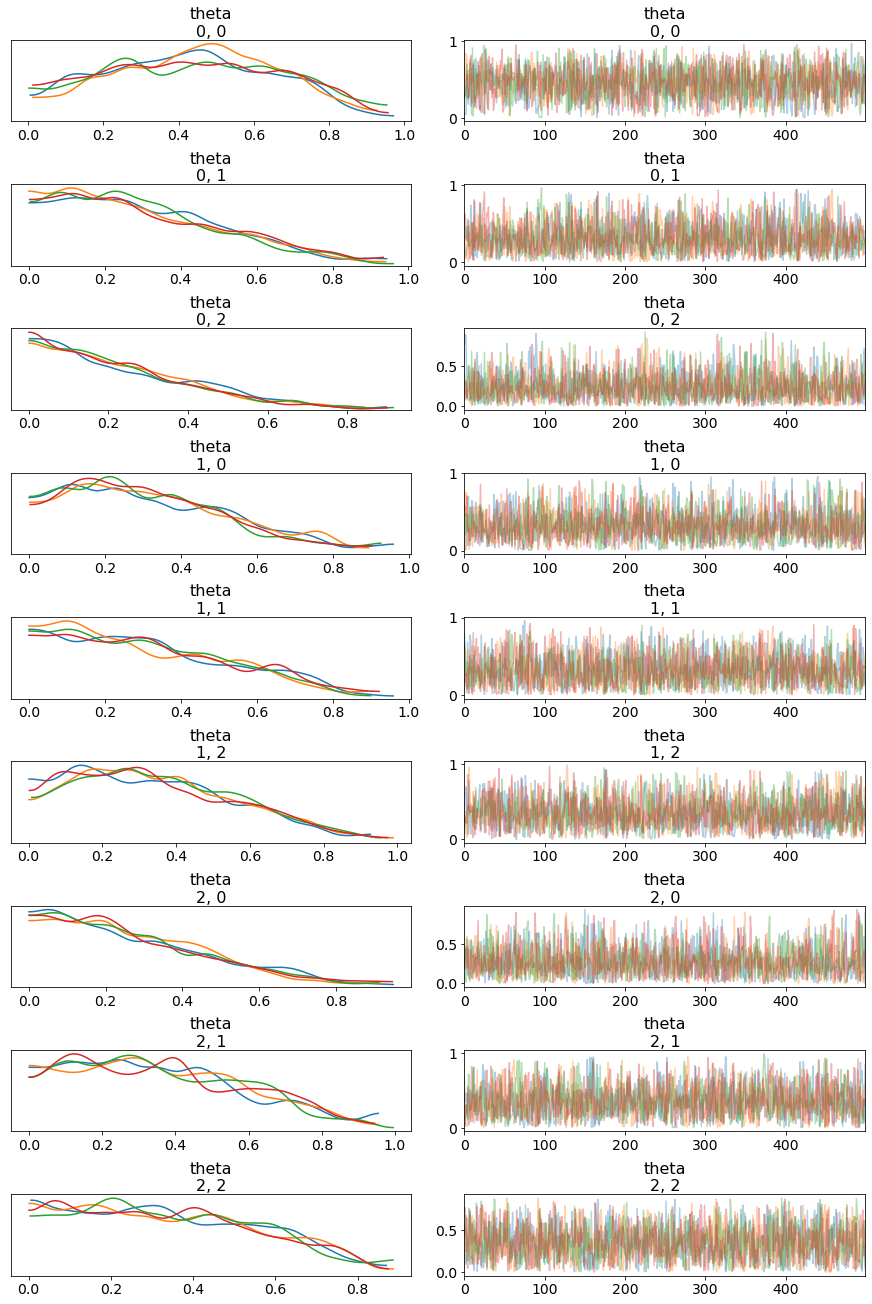

In [7]:
arviz.plot_trace(fit)